In [1]:
import pandas as pd                 # pandas allows me to read and manipulate my csv data with python in dataframes
from datetime import datetime       # datetime allows me to parse through datetime timestamps in cells and isolate specific parts of the timestamp (e.g. hour, minute sec)
import os                           # os allows me to run the code on each file within a folder
import scipy                        # scipy calculates statistical measurements needed
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Index(['UTCDateTime', 'PA-8d18', 'PA-803e', 'PA-8079', 'PA-adb9', 'PA-c074',
       'tceq_conc', 'tceq_pm25', 'unit'],
      dtype='object')


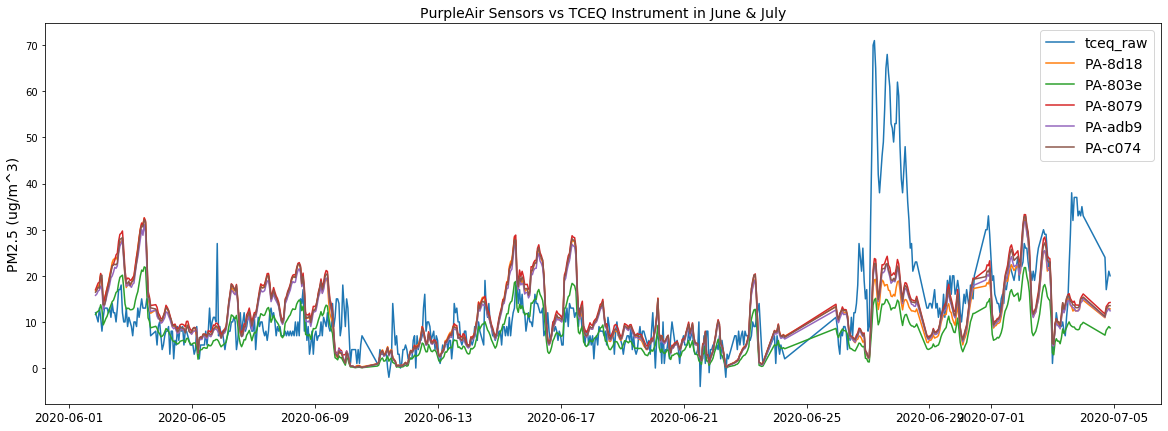

In [2]:

# dfpa1 = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\PA-II-SD\Combined_Hourly_Median\PA-8d18_hr_med.csv')
dfpa1 = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\PA-II_PA-II-SD_new_avg\PA-8d18.csv')
dfpa2 = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\PA-II_PA-II-SD_new_avg\PA-803e.csv')
dfpa3 = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\PA-II_PA-II-SD_new_avg\PA-8079.csv')
dfpa4 = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\PA-II_PA-II-SD_new_avg\PA-adb9.csv')
dfpa5 = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\PA-II_PA-II-SD_new_avg\PA-c074.csv')
dftc = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\TCEQ\tceq_pm25_april-sept2020.csv')

p1name = 'PA-8d18'
p2name = 'PA-803e'
p3name = 'PA-8079'
p4name = 'PA-adb9'
p5name = 'PA-c074'

parameter = 'pm2_5_atm_avg'

dfpa1 = dfpa1[['UTCDateTime', parameter]]
dfpa1.columns = ['UTCDateTime',p1name]
dfpa2 = dfpa2[['UTCDateTime', parameter]]
dfpa2.columns = ['UTCDateTime',p2name]
dfpa3 = dfpa3[['UTCDateTime', parameter]]
dfpa3.columns = ['UTCDateTime',p3name]
dfpa4 = dfpa4[['UTCDateTime', parameter]]
dfpa4.columns = ['UTCDateTime',p4name]
dfpa5 = dfpa5[['UTCDateTime', parameter]]
dfpa5.columns = ['UTCDateTime',p5name]


dftc = dftc[dftc['tceq_pm25'] != -999] #filter our rows where no data is available (i.e. -999)

################ Change to DateTime Format ########################################
dfpa1['UTCDateTime'] = pd.to_datetime(dfpa1['UTCDateTime'],format='%Y/%m/%d %H:%M')
dfpa2['UTCDateTime'] = pd.to_datetime(dfpa2['UTCDateTime'],format='%Y/%m/%d %H:%M')
dfpa3['UTCDateTime'] = pd.to_datetime(dfpa3['UTCDateTime'],format='%Y/%m/%d %H:%M')
dfpa4['UTCDateTime'] = pd.to_datetime(dfpa4['UTCDateTime'],format='%Y/%m/%d %H:%M')
dfpa5['UTCDateTime'] = pd.to_datetime(dfpa5['UTCDateTime'],format='%Y/%m/%d %H:%M')
dftc['UTCDateTime'] = pd.to_datetime(dftc['UTCDateTime'],format='%Y/%m/%d %H:%M')

################ Merge all files together #########################################
merged = pd.merge(dfpa1,dfpa2, on='UTCDateTime')
merged = pd.merge(merged,dfpa3, on='UTCDateTime')
merged = pd.merge(merged,dfpa4, on='UTCDateTime')
merged = pd.merge(merged,dfpa5, on='UTCDateTime')
merged = pd.merge(merged,dftc, on='UTCDateTime')
print(merged.columns)

merged = merged[['UTCDateTime', p1name, p2name, p3name, p4name, p5name, 'tceq_pm25']]


################## Filter for Time ###################################################
merged = merged[(merged['UTCDateTime'] > '2020-05-31')]# & (merged['UTCDateTime'] < '2020-06-06')]


################## Group By Day ###################################################
# merged['UTCDateTime'] = merged['UTCDateTime'].dt.floor('d') #Drops off the minutes and seconds of the time
# merged = pd.DataFrame(merged.groupby(['UTCDateTime'],as_index=False).mean()) #groupby hour



################## Plots ###################################################
time = merged['UTCDateTime']
trc = merged['tceq_pm25']
p1 = merged[p1name]
p2 = merged[p2name]
p3 = merged[p3name]
p4 = merged[p4name]
p5 = merged[p5name]


plt.figure(figsize=(20,7))
plt.plot(time,trc, label='tceq_raw')
plt.plot(time,p1, label=p1name)
plt.plot(time,p2, label=p2name)
plt.plot(time,p3, label=p3name)
plt.plot(time,p4, label=p4name)
plt.plot(time,p5, label=p5name)
plt.ylabel('PM2.5 (ug/m^3)', fontsize=14)
plt.xticks(fontsize=12)
plt.title('PurpleAir Sensors vs TCEQ Instrument in June & July', fontsize=14)
plt.legend(fontsize=14)
# plt.savefig(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\PA-II-SD\Plots\06-1_07-5_TimePlotComparison_B.png')

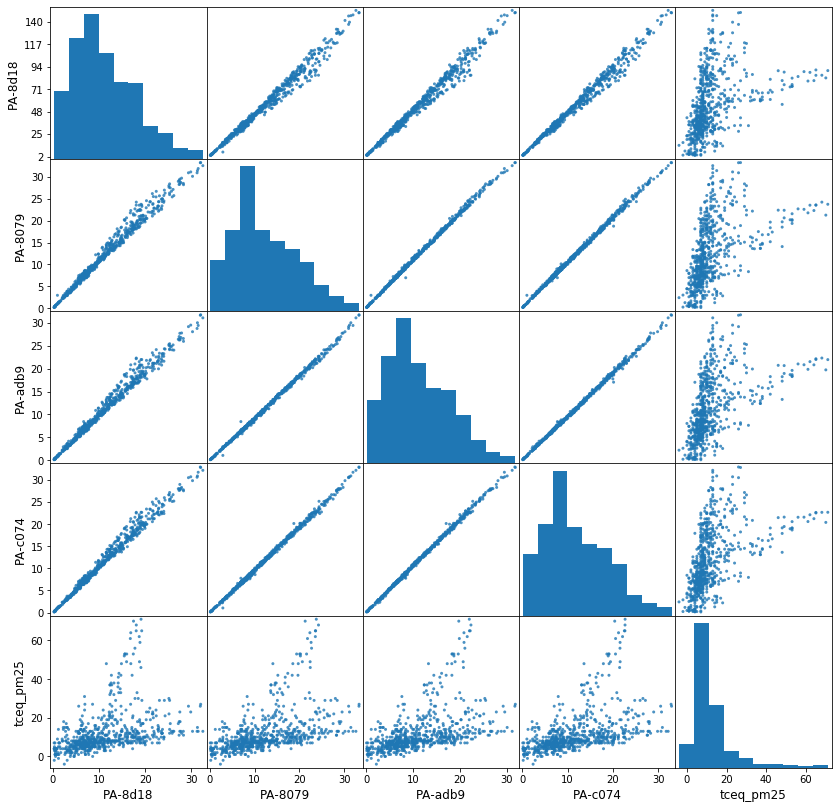

In [3]:
from pandas.plotting import scatter_matrix
from matplotlib.ticker import FormatStrFormatter

merged = merged.drop(columns = [p2name])

scatter_matrix = scatter_matrix(merged, alpha=0.8, figsize=(14,14))

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 12, rotation = 90)
    ax.set_xticklabels(ax.get_xticks(), fontsize = 10, rotation = 0)
    ax.set_yticklabels(ax.get_yticks(), fontsize = 10)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))


# plt.savefig(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\PA-II-SD\Plots\06-1_07-5_ScatterComparison_B.png')

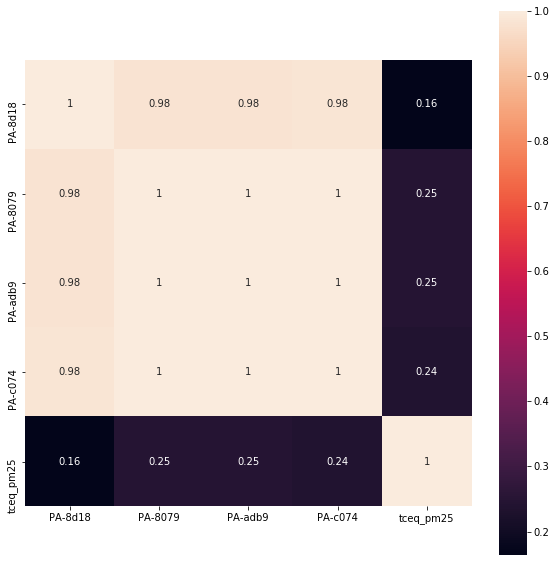

In [4]:
import seaborn as sns
corr = merged.corr()**2
plt.subplots(figsize=(10,10))
sns.heatmap(corr,square=True,annot=True)

PA-8d18 = 1.0


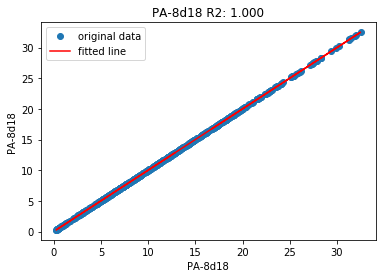

PA-8d18 = 0.9813046594481745


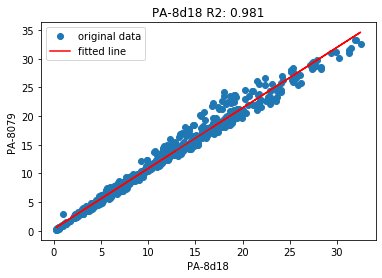

PA-8d18 = 0.982479527867878


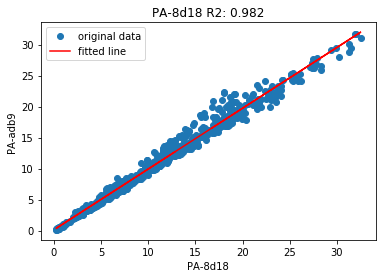

PA-8d18 = 0.9845685125071407


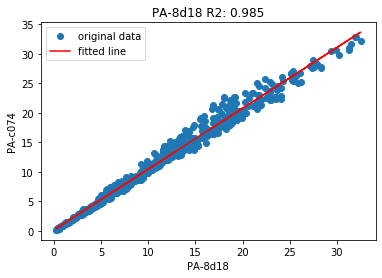

PA-8079 = 0.9813046594481745


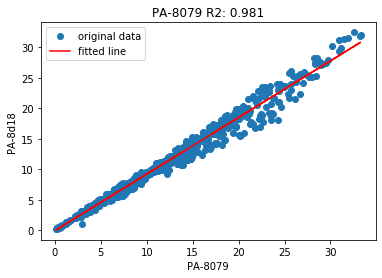

PA-8079 = 1.0


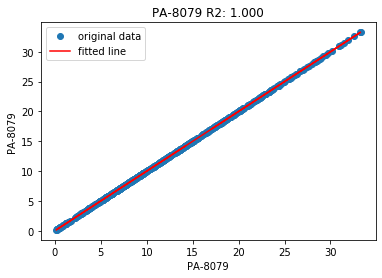

PA-8079 = 0.9982331679771349


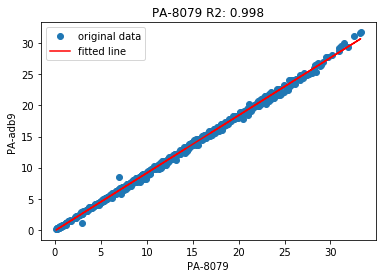

PA-8079 = 0.9979954312328381


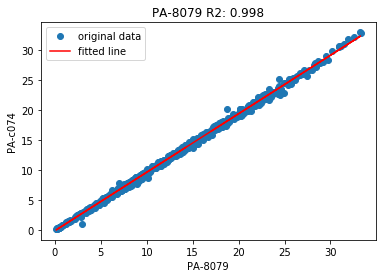

PA-adb9 = 0.982479527867878


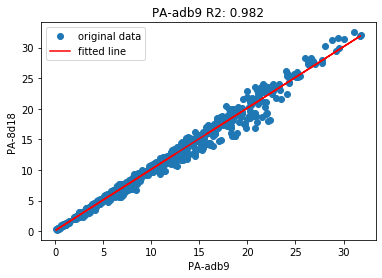

PA-adb9 = 0.9982331679771349


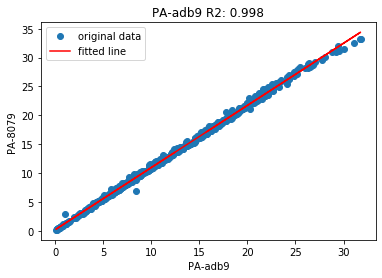

PA-adb9 = 1.0


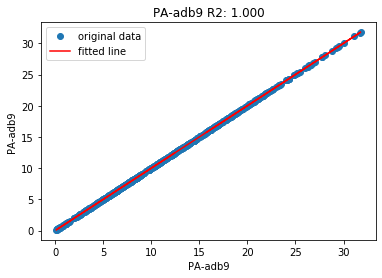

PA-adb9 = 0.9985108842935999


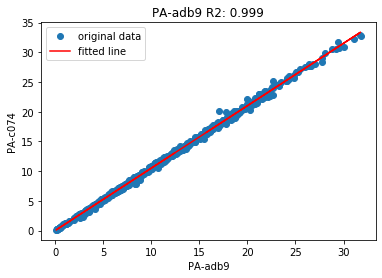

PA-c074 = 0.9845685125071407


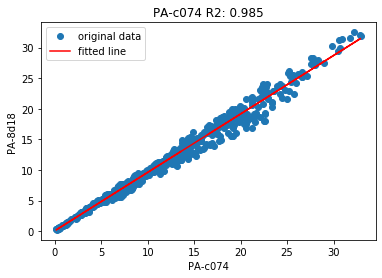

PA-c074 = 0.9979954312328381


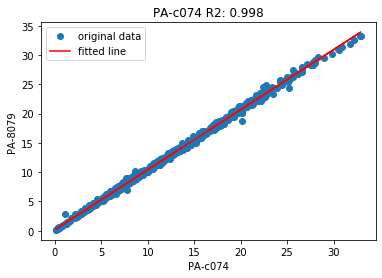

PA-c074 = 0.9985108842935999


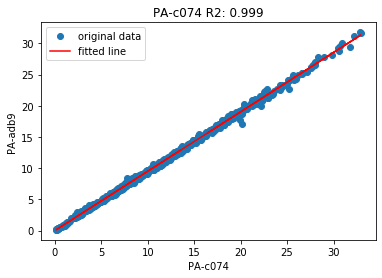

PA-c074 = 1.0


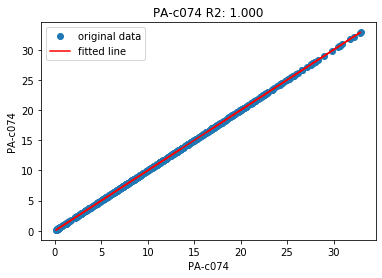

In [5]:
for x in range (1,5):
    for y in range (1,5):
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(merged.iloc[:,x], merged.iloc[:,y])
        print(str(merged.columns[x]) + ' = ' + str(r_value**2))
        plt.plot(merged.iloc[:,x], merged.iloc[:,y], 'o', label='original data')#,title='R2')
        plt.plot(merged.iloc[:,x], intercept + slope*merged.iloc[:,x], 'r',label='fitted line')#+ str(r_value**2))
        # plt.title('R2:' + str(r_value**2))
        plt.title(str(merged.columns[x])+' R2: %.3f'% + r_value**2)
        plt.xlabel(merged.columns[x])
        plt.ylabel(merged.columns[y])
        plt.legend()
        plt.show()

In [18]:
from pandas.plotting import scatter_matrix
from matplotlib.ticker import FormatStrFormatter
%matplotlib 
# %matplotlib inline

scatter_matrix = scatter_matrix(merged, alpha=0.8, figsize=(18,18))

#Change axis lengths
# for ax in scatter_matrix.ravel():
#     ax.set_xlim([0,70]) 
#     ax.set_ylim([0,70])

#Remove upper part of scatterplot matrix
for i in range(np.shape(scatter_matrix)[0]):
    for j in range(np.shape(scatter_matrix)[1]):
        if i <= j: #Less than shows historgrams, less than equal removes 
            scatter_matrix[i,j].set_visible(False)
            
plt.show()

# plt.savefig(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\PA-II-SD\Plots\04-12_05-29_ScatterComparison_B.png')

Using matplotlib backend: Qt5Agg


In [20]:
from pandas.plotting import scatter_matrix
from matplotlib.ticker import FormatStrFormatter
%matplotlib

scatter_matrix = scatter_matrix(merged, alpha=0.8, figsize=(18,18))

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 12, rotation = 90)
    ax.set_xticklabels(ax.get_xticks(), fontsize = 10, rotation = 0)
    ax.set_yticklabels(ax.get_yticks(), fontsize = 10)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

#Remove upper part of scatterplot matrix
for i in range(np.shape(scatter_matrix)[0]):
    for j in range(np.shape(scatter_matrix)[1]):
        if i < j: #Less than shows historgrams, less than equal removes 
            scatter_matrix[i,j].set_visible(False)
            
plt.show()

Using matplotlib backend: Qt5Agg


Index(['UTCDateTime', 'tceq_conc', 'tceq_pm25', 'unit'], dtype='object')
Index(['UTCDateTime', 'current_temp_f', 'current_humidity',
       'current_dewpoint_f', 'pressure', 'pm1_0_atm', 'pm2_5_atm',
       'pm10_0_atm', 'pm1_0_atm_b', 'pm2_5_atm_b', 'pm10_0_atm_b'],
      dtype='object')
Index(['UTCDateTime', 'current_temp_f', 'current_humidity',
       'current_dewpoint_f', 'pressure', 'pm1_0_atm', 'pm2_5_atm',
       'pm10_0_atm', 'pm1_0_atm_b', 'pm2_5_atm_b', 'pm10_0_atm_b', 'tceq_conc',
       'tceq_pm25', 'unit'],
      dtype='object')


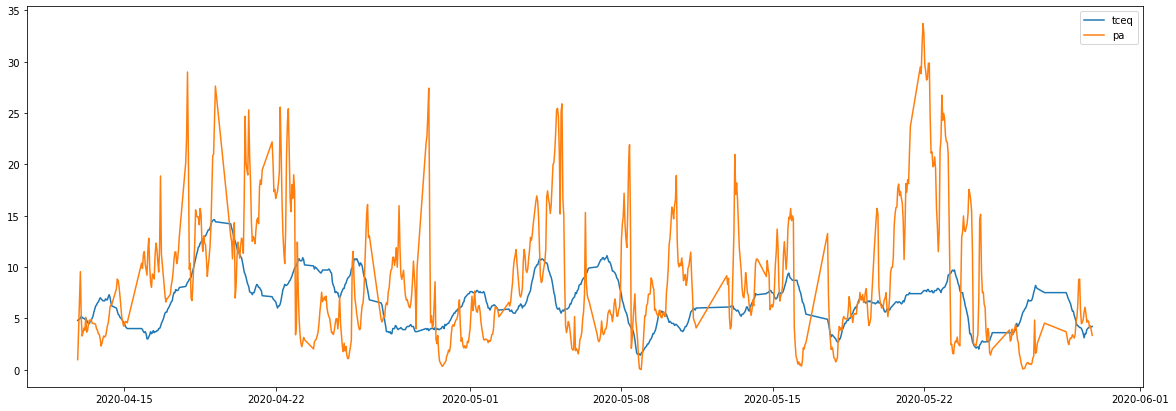

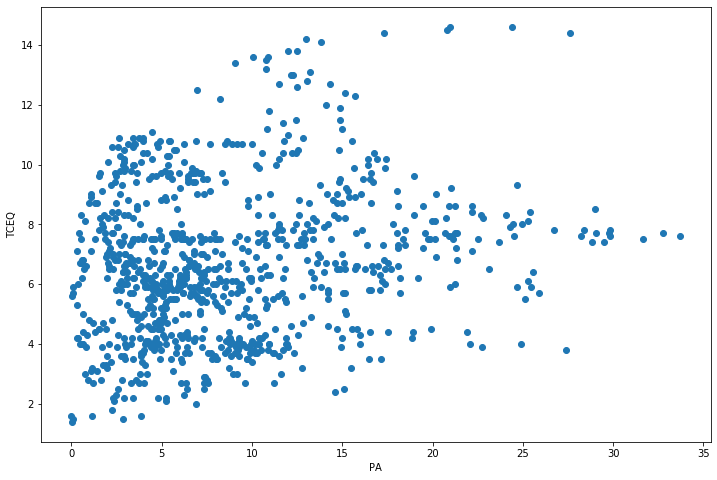

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfpa = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\PA-II-SD\Combined_Hourly_Avg_NoFilter\PA-80f1_hourly.csv')
dftc = pd.read_csv(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\TCEQ\tceq_pm25_april-sept2020.csv')

dfpa = dfpa[['UTCDateTime','current_temp_f', 'current_humidity', 'current_dewpoint_f', 'pressure',
       'pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm',
       'pm1_0_atm_b', 'pm2_5_atm_b', 'pm10_0_atm_b']]

dftc = dftc[dftc['tceq_pm25'] != -999] #filter our rows where no data is available (i.e. -999)
print(dftc.columns)
print(dfpa.columns)


dfpa['UTCDateTime'] = pd.to_datetime(dfpa['UTCDateTime'],format='%Y/%m/%d %H:%M')
dftc['UTCDateTime'] = pd.to_datetime(dfpa['UTCDateTime'],format='%Y/%m/%d %H:%M')

merged = pd.merge(dfpa,dftc, on='UTCDateTime')
print(merged.columns)
merged = merged[['UTCDateTime', 'current_temp_f', 'current_humidity',
       'current_dewpoint_f', 'pressure', 'pm1_0_atm', 'pm2_5_atm',
       'pm10_0_atm', 'pm1_0_atm_b', 'pm2_5_atm_b', 'pm10_0_atm_b',
       'tceq_pm25','tceq_conc']]


merged = merged[merged['UTCDateTime'] > '2020-04-11']

x = merged['UTCDateTime']
y1 = merged['tceq_conc']
y2 = merged['pm2_5_atm_b']

plt.figure(figsize=(20,7))
# plt.plot(x,y, label='bsp (Mm-1)')
plt.plot(x,y1, label='tceq')
plt.plot(x,y2, label='pa')
plt.legend()



plt.figure(figsize=(12,8))
plt.scatter(y2,y1)
plt.xlabel('PA')
plt.ylabel('TCEQ')
plt.show()